## Machine Learning Online Class

  Exercise 6 | Support Vector Machines

#### Instructions
  ------------
 
  This file contains code that helps you get started on the
  exercise. You will need to complete the following functions:

     gaussianKernel.m
     dataset3Params.m
     processEmail.m
     emailFeatures.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.


In [1]:
## Initialization
import numpy as np;
import scipy.io as sio;
from scipy.optimize import minimize
from sklearn.svm import SVC

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 


#### =============== Part 1: Loading and Visualizing Data ================

In [2]:
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

# Load Training Data
print('Loading and Visualizing Data ...');

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
mat_contents = sio.loadmat('ex6data1.mat');
print('   ...Done.')
print('\nContents of mat file...')
print(mat_contents.keys())
X = mat_contents['X'];
y = mat_contents['y'];

# m = Number of examples
m = np.shape(X)[0];
print('\n')
print('Dimensions of X: {0}'.format(X.shape));
print('Dimensions of y: {0}'.format(y.shape));

Loading and Visualizing Data ...
   ...Done.

Contents of mat file...
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


Dimensions of X: (51, 2)
Dimensions of y: (51, 1)


In [3]:
def plotData(X, y, figsize=(5, 5)):
    #PLOTDATA Plots the data points X and y into a new figure 
    #   PLOTDATA(x,y) plots the data points with + for the positive examples
    #   and o for the negative examples. X is assumed to be a Mx2 matrix.

    # Create New Figure
    fig, ax = plt.subplots(figsize=figsize)

    # Find Indices of Positive and Negative Examples
    pos = (y == 1).ravel()
    neg = (y == 0).ravel();
    
    # Plot Examples
    # we use the ravel command to convert from 2d to 1d arrays
    series1 = ax.plot(X[pos,0], X[pos,1], 'k+', linewidth=2, markersize=7);
    series2 = ax.plot(X[neg,0], X[neg,1], 'ko', color='y', alpha=0.8, markersize=7);
    
    return ax;

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



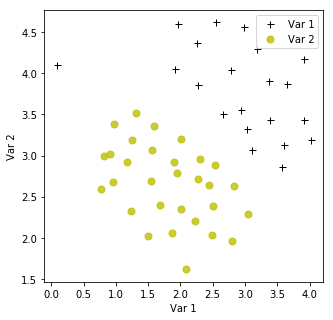

In [4]:
print('Plotting data with + indicating (y = 1) examples and o ' + 
         'indicating (y = 0) examples.\n');

ax = plotData(X, y);
# Labels and Legend
plt.xlabel('Var 1');
plt.ylabel('Var 2');
legend = ax.legend(labels=['Var 1', 'Var 2']);

#### ==================== Part 2: Training Linear SVM ====================

In [5]:
def visualizeBoundaryLinear(ax, X, y, svc, mesh_step=0.01, padding=0.25, showSVs=True):
    
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    x_mg, y_mg = np.meshgrid(np.arange(x_min, x_max, mesh_step), np.arange(y_min, y_max, mesh_step))
    
    Z = svc.predict(np.c_[x_mg.ravel(), y_mg.ravel()])
    Z = Z.reshape(x_mg.shape)
    cs = ax.contourf(x_mg, y_mg, Z, cmap="Blues", alpha=0.2, label='Decision Boundary');

    sv = svc.support_vectors_

    if showSVs:
        ax.scatter(sv[:,0], sv[:,1], c='purple', marker='x', s=80, linewidths='1', label='Support Vectors')
    
    plt.title('Number of support vectors: {0}'.format(svc.support_.size));
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    


Training Linear SVM ...



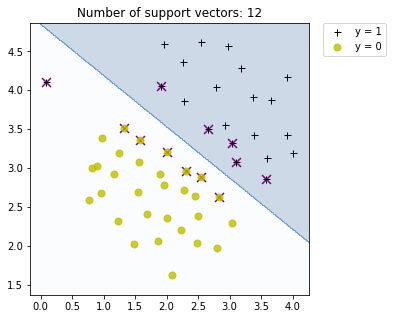

In [6]:
#  The following code will train a linear SVM on the dataset and plot the
#  decision boundary learned.
#
print('\nTraining Linear SVM ...\n')

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)

clf = SVC(C=1.0, kernel='linear')
clf.fit(X, y.ravel())

ax = plotData(X, y);
visualizeBoundaryLinear(ax, X, y, clf);
ax.legend(labels=['y = 1', 'y = 0'],
              bbox_to_anchor=(1.05, 1), loc=2, 
              borderaxespad=0.);

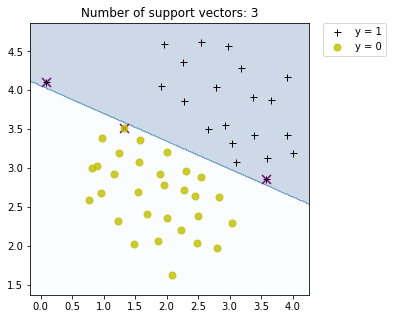

In [7]:
clf = SVC(C=1000.0, kernel='linear')
clf.fit(X, y.ravel())

ax = plotData(X, y);
visualizeBoundaryLinear(ax, X, y, clf);
ax.legend(labels=['y = 1', 'y = 0'],
              bbox_to_anchor=(1.05, 1), loc=2, 
              borderaxespad=0.);

#### =============== Part 3: Implementing Gaussian Kernel ===============

In [10]:
def gaussianKernel(x1, x2, sigma):
    #RBFKERNEL returns a radial basis function kernel between x1 and x2
    #   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
    #   and returns the value in sim

    # Ensure that x1 and x2 are column vectors
    x1 = x1.reshape(-1,1); 
    x2 = x2.reshape(-1,1);

    # You need to return the following variables correctly.
    sim = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return the similarity between x1
    #               and x2 computed using a Gaussian kernel with bandwidth
    #               sigma
    #
    #

    sim = np.exp(-np.sum(((x1 - x2)**2))/(2 * sigma ** 2));
    return sim;

In [12]:
#  You will now implement the Gaussian kernel to use
#  with the SVM. You should complete the code in gaussianKernel.m
#
print('\nEvaluating the Gaussian Kernel ...\n')

x1 = np.array([1, 2, 1]); 
x2 = np.array([0, 4, -1]); 
sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {0:0.1f} : {1:0.6f}'.format(sigma, sim)); 
print('\t(for sigma = 2, this value should be about 0.324652)\n');



Evaluating the Gaussian Kernel ...

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.0 : 0.324652
	(for sigma = 2, this value should be about 0.324652)



#### =============== Part 4: Visualizing Dataset 2 ================

In [13]:
#  The following code will load the next dataset into your environment and 
#  plot the data. 
#

print('Loading and Visualizing Data ...');

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
mat_contents = sio.loadmat('ex6data2.mat');
print('   ...Done.')
print('\nContents of mat file...')
print(mat_contents.keys())
X = mat_contents['X'];
y = mat_contents['y'];

# m = Number of examples
m = np.shape(X)[0];
print('\n')
print('Dimensions of X: {0}'.format(X.shape));
print('Dimensions of y: {0}'.format(y.shape));

Loading and Visualizing Data ...
   ...Done.

Contents of mat file...
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


Dimensions of X: (863, 2)
Dimensions of y: (863, 1)


Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



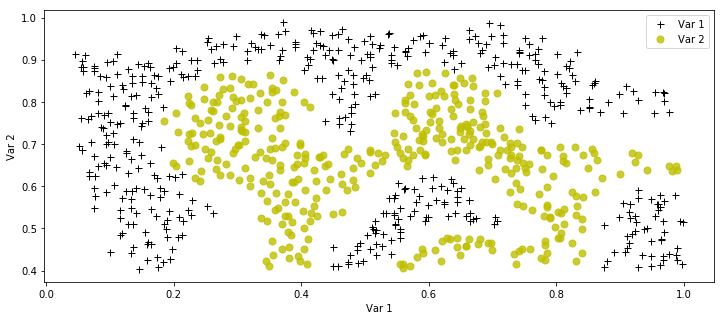

In [14]:
print('Plotting data with + indicating (y = 1) examples and o ' + 
         'indicating (y = 0) examples.\n');

ax = plotData(X, y, figsize=(12,5));
# Labels and Legend
plt.xlabel('Var 1');
plt.ylabel('Var 2');
legend = ax.legend(labels=['Var 1', 'Var 2']);

#### ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...



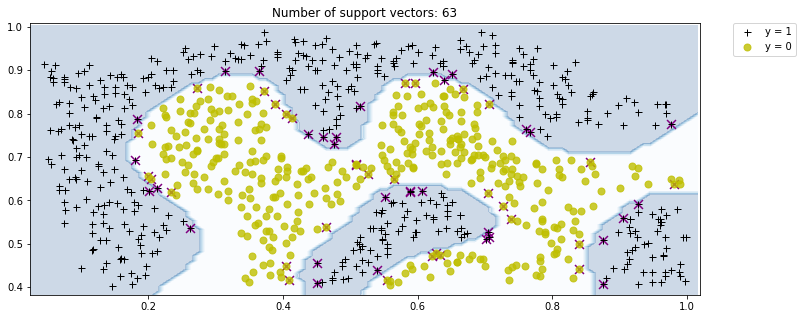

In [15]:
#  After you have implemented the kernel, we can now use it to train the 
#  SVM classifier.
# 
print('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');

# SVM Parameters
C = 80; gamma = 25;

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.

clf = SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y.ravel())

ax = plotData(X, y, figsize=(12,5));
visualizeBoundaryLinear(ax, X, y, clf, padding=0.02);
ax.legend(labels=['y = 1', 'y = 0'],
              bbox_to_anchor=(1.05, 1), loc=2, 
              borderaxespad=0.);


#### =============== Part 6: Visualizing Dataset 3 ================

In [16]:
#  The following code will load the next dataset into your environment and 
#  plot the data. 
#

print('Loading and Visualizing Data ...');

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
mat_contents = sio.loadmat('ex6data3.mat');
print('   ...Done.')
print('\nContents of mat file...')
print(mat_contents.keys())
X = mat_contents['X'];
y = mat_contents['y'];
Xval = mat_contents['Xval'];
yval = mat_contents['yval'];

# m = Number of examples
m = np.shape(X)[0];
print('\n')
print('Dimensions of X: {0}'.format(X.shape));
print('Dimensions of y: {0}'.format(y.shape));
print('Dimensions of Xval: {0}'.format(Xval.shape));
print('Dimensions of yval: {0}'.format(yval.shape));

Loading and Visualizing Data ...
   ...Done.

Contents of mat file...
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


Dimensions of X: (211, 2)
Dimensions of y: (211, 1)
Dimensions of Xval: (200, 2)
Dimensions of yval: (200, 1)


Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



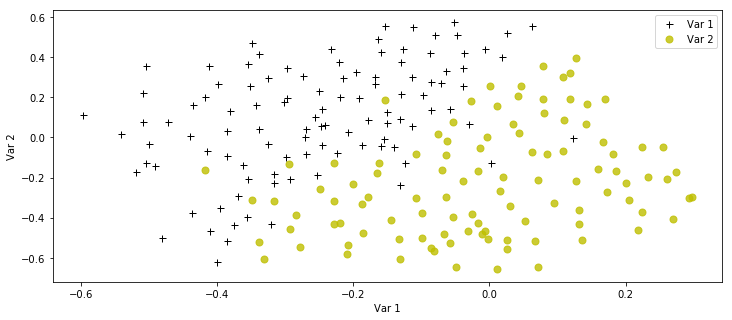

In [17]:
print('Plotting data with + indicating (y = 1) examples and o ' + 
         'indicating (y = 0) examples.\n');

ax = plotData(X, y, figsize=(12,5));
# Labels and Legend
plt.xlabel('Var 1');
plt.ylabel('Var 2');
legend = ax.legend(labels=['Var 1', 'Var 2']);

#### ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

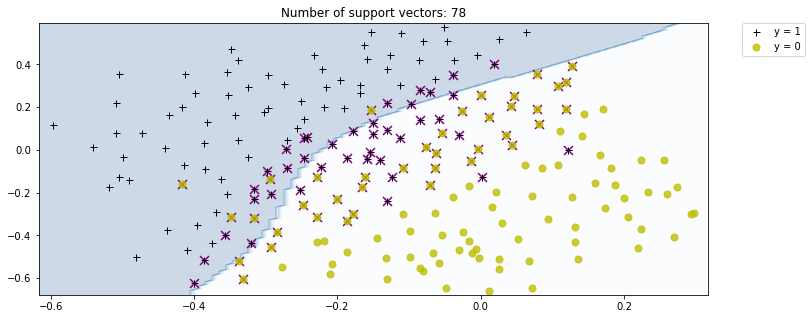

In [18]:
#  This is a different dataset that you can use to experiment with. Try
#  different values of C and sigma here.
# 
clf = SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf.fit(X, y.ravel())

ax = plotData(X, y, figsize=(12,5));
visualizeBoundaryLinear(ax, X, y, clf, padding=0.02);
ax.legend(labels=['y = 1', 'y = 0'],
              bbox_to_anchor=(1.05, 1), loc=2, 
              borderaxespad=0.);

In [19]:
def dataset3Params(X, y, Xval, yval):
    #DATASET3PARAMS returns your choice of C and gamma for Part 3 of the exercise
    #where you select the optimal (C, gamma) learning parameters to use for SVM
    #with RBF kernel
    #   [C, gamma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
    #   gamma. You should complete this function to return the optimal C and 
    #   gamma based on a cross-validation set.
    #

    # You need to return the following variables correctly.
    C = 1;
    gamma = 1;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return the optimal C and gamma
    #               learning parameters found using the cross validation set.
    #               You can use svmPredict to predict the labels on the cross
    #               validation set. For example, 
    #                   predictions = svmPredict(model, Xval);
    #               will return the predictions on the cross validation set.
    #
    #  Note: You can compute the prediction error using 
    #        mean(double(predictions ~= yval))
    #
    dim = 10;
    dim = np.floor_divide(dim, 2) * 2;
    halfDim = np.int(dim/2);
    cRng = np.matlib.repmat([0.01, 0.03],1, halfDim) * (10 ** np.floor(np.arange(0, halfDim, 0.5)));
    gammaRng = np.matlib.repmat([0.01, 0.03],1, halfDim) * (10 ** np.floor(np.arange(0, halfDim, 0.5)));
    results = np.zeros((dim,dim));
    counter = 1;
    for i in np.arange(dim):
      for j in np.arange(dim):
        counter = counter + 1
        cTest = cRng[0, i]
        gammaTest = gammaRng[0, j]
        clf = SVC(C=cTest, kernel='rbf', gamma=gammaTest);
        clf.fit(X, y.ravel());
        predictions = clf.predict(Xval);
        
        results[i,j] = np.mean(predictions != yval);

    print(np.min(results));
    position = np.asarray(np.where(results==np.min(results)))
    C = cRng[0, position[0,0]]
    gamma = gammaRng[0, position[1,0]]
    return C, gamma;

0.48635
30.0 0.3


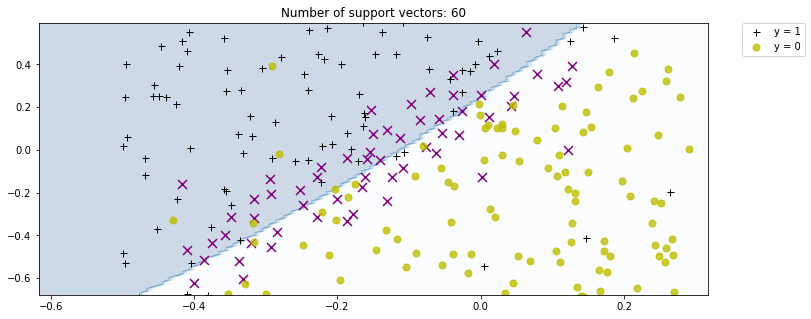

In [20]:
# Try different SVM Parameters here
[C_optimal, gamma_optimal] = dataset3Params(X, y, Xval, yval);
print(C_optimal, gamma_optimal)

# Train the SVM
clf = SVC(C=C_optimal, kernel='rbf', gamma=gamma_optimal)
clf.fit(X, y.ravel())

ax = plotData(Xval, yval, figsize=(12,5));
visualizeBoundaryLinear(ax, X, y, clf, padding=0.02, showSVs=True);
ax.legend(labels=['y = 1', 'y = 0'],
              bbox_to_anchor=(1.05, 1), loc=2, 
              borderaxespad=0.);

## Machine Learning Online Class - Exercise 6 | Spam Classification with SVMs

#### Instructions
  ------------
 
  This file contains code that helps you get started on the
  exercise. You will need to complete the following functions:

     gaussianKernel.m
     dataset3Params.m
     processEmail.m
     emailFeatures.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.


In [21]:
## Initialization
import numpy as np;
import pandas as pd;
import scipy.io as sio;
from scipy.optimize import minimize
from sklearn.svm import SVC

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 


#### ==================== Part 1: Email Preprocessing ====================

In [22]:
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

print('\nPreprocessing sample email (emailSample1.txt)\n');

# Extract Features
file_contents = pd.read_table('emailSample1.txt', header=None)
file_contents.info()
print(file_contents)
#file_contents = readFile('emailSample1.txt');
#word_indices  = processEmail(file_contents);

# Print Stats
#print('Word Indices: \n');
#print(word_indices);
#print('\n\n');

#data = pd.read_table('data/vocab.txt', header=None)




Preprocessing sample email (emailSample1.txt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
0    8 non-null object
dtypes: object(1)
memory usage: 144.0+ bytes
                                                   0
0  > Anyone knows how much it costs to host a web...
1                                                  >
2  Well, it depends on how many visitors you're e...
3  This can be anywhere from less than 10 bucks a...
4  You should checkout http://www.rackspace.com/ ...
5                   if youre running something big..
6  To unsubscribe yourself from this mailing list...
7                  groupname-unsubscribe@egroups.com


In [23]:
def getVocabList():
    #GETVOCABLIST reads the fixed vocabulary list in vocab.txt and returns a
    #cell array of the words
    #   vocabList = GETVOCABLIST() reads the fixed vocabulary list in vocab.txt 
    #   and returns a cell array of the words in vocabList.
    vocabList = np.loadtxt('vocab.txt', dtype=bytes, usecols=[1]).astype(str)
    return vocabList

In [24]:
from nltk.stem.porter import *;

def processEmail(email_contents):
    #PROCESSEMAIL preprocesses a the body of an email and
    #returns a list of word_indices 
    #   word_indices = PROCESSEMAIL(email_contents) preprocesses 
    #   the body of an email and returns a list of indices of the 
    #   words contained in the email. 
    #

    # Load Vocabulary
    vocabList = getVocabList();

    # Init return value
    word_indices = np.array([], dtype=int);

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    # hdrstart = strfind(email_contents, ([char(10) char(10)]));
    # email_contents = email_contents(hdrstart(1):end);

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)
    
    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.sub('[0-9]+', 'number', email_contents)
    
    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)

    # Handle $ sign
    email_contents = re.sub('[$]+', 'dollar', email_contents)

    # ========================== Tokenize Email ===========================

    print(email_contents)
    # Output the email to screen as well
    print('\n==== Processed Email ====\n\n');

    # Process file
    l = 0;

    while email_contents:

        # Tokenize and also get rid of any punctuation
        [strtok, email_contents] = re.split('\W+', email_contents, maxsplit=1);

        # Remove any non alphanumeric characters
        strtok = re.sub('[^a-zA-Z0-9]', '', strtok)
        
        # Stem the word 
        porterStemmer = PorterStemmer();
        strtok = porterStemmer.stem(strtok)

        # Skip the word if it is too short
        #if len(strtok) < 1:
        #   break;

        # Look up the word in the dictionary and add to word_indices if
        # found
        # ====================== YOUR CODE HERE ======================
        # Instructions: Fill in this function to add the index of str to
        #               word_indices if it is in the vocabulary. At this point
        #               of the code, you have a stemmed word from the email in
        #               the variable str. You should look up str in the
        #               vocabulary list (vocabList). If a match exists, you
        #               should add the index of the word to the word_indices
        #               vector. Concretely, if str = 'action', then you should
        #               look up the vocabulary list to find where in vocabList
        #               'action' appears. For example, if vocabList{18} =
        #               'action', then, you should add 18 to the word_indices 
        #               vector (e.g., word_indices = [word_indices ; 18]; ).
        # 
        # Note: vocabList{idx} returns a the word with index idx in the
        #       vocabulary list.
        # 
        # Note: You can use strcmp(str1, str2) to compare two strings (str1 and
        #       str2). It will return 1 only if the two strings are equivalent.
        #
   
        idx = np.where(strtok == vocabList)[0]
        if len(idx):
            word_indices = np.append(word_indices, idx[0]);

        # =============================================================

        # Print to screen, ensuring that the output lines are not too long
        if (l + len(strtok) + 1) > 78:
            print('', end='\n');
            l = 0;
        
        print('{0:s} '.format(strtok), end='');
        l = l + len(strtok) + 1;

    # Print footer
    print('\n\n=========================\n');

    return word_indices;

In [25]:
def emailFeatures(word_indices):
    #EMAILFEATURES takes in a word_indices vector and produces a feature vector
    #from the word indices
    #   x = EMAILFEATURES(word_indices) takes in a word_indices vector and 
    #   produces a feature vector from the word indices. 

    # Total number of words in the dictionary
    n = 1899;

    # You need to return the following variables correctly.
    x = np.zeros((n, 1));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return a feature vector for the
    #               given email (word_indices). To help make it easier to 
    #               process the emails, we have have already pre-processed each
    #               email and converted each word in the email into an index in
    #               a fixed dictionary (of 1899 words). The variable
    #               word_indices contains the list of indices of the words
    #               which occur in one email.
    # 
    #               Concretely, if an email has the text:
    #
    #                  The quick brown fox jumped over the lazy dog.
    #
    #               Then, the word_indices vector for this text might look 
    #               like:
    #               
    #                   60  100   33   44   10     53  60  58   5
    #
    #               where, we have mapped each word onto a number, for example:
    #
    #                   the   -- 60
    #                   quick -- 100
    #                   ...
    #
    #              (note: the above numbers are just an example and are not the
    #               actual mappings).
    #
    #              Your task is take one such word_indices vector and construct
    #              a binary feature vector that indicates whether a particular
    #              word occurs in the email. That is, x(i) = 1 when word i
    #              is present in the email. Concretely, if the word 'the' (say,
    #              index 60) appears in the email, then x(60) = 1. The feature
    #              vector should look like:
    #
    #              x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..];
    #
    #

    x[word_indices, 0] = 1;

    return x

#### ==================== Part 2: Feature Extraction ====================

In [26]:
#  Now, you will convert each email into a vector of features in R^n. 
#  You should complete the code in emailFeatures.m to produce a feature
#  vector for a given email.

print('\nExtracting features from sample email (emailSample1.txt)\n');

# Extract Features
file = open('emailSample1.txt', 'r');
file_contents = file.read();
file.close();

word_indices = processEmail(file_contents);
print('Word Indices:')
print(word_indices)

features = emailFeatures(word_indices);
print('Features:')
print(features)

# Print Stats
print('Length of feature vector: {0:d}'.format(np.size(features)));
print('Number of non-zero entries: {0:d}'.format(np.sum(features > 0)));


Extracting features from sample email (emailSample1.txt)

> anyone knows how much it costs to host a web portal ?
>
well, it depends on how many visitors you're expecting.
this can be anywhere from less than number bucks a month to a couple of dollarnumber. 
you should checkout httpaddr or perhaps amazon ecnumber 
if youre running something big..

to unsubscribe yourself from this mailing list, send an email to:
emailaddr



==== Processed Email ====


 anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 


Word Indices:
[  85  915  793 1076  882  369 1698  789 1821 1830  882  430 1170  793 1001
 1892 1363  591 1675  237  161   88  687  944 1662 1119 1061 1698  374 1161
  478 1892 1509  798 1181 1236  809 1894 1439 

#### =========== Part 3: Train Linear SVM for Spam Classification ========

In [28]:
#  In this section, you will train a linear classifier to determine if an
#  email is Spam or Not-Spam.

# Load the Spam Email dataset
# You will have X, y in your environment
print('Loading Data ...');
mat_contents = sio.loadmat('spamTrain.mat');
print('   ...Done.')
print('\nContents of mat file...')
print(mat_contents.keys())
X = mat_contents['X'];
y = mat_contents['y'];

# m = Number of examples
m = np.shape(X)[0];
print('\n')
print('Dimensions of X: {0}'.format(X.shape));
print('Dimensions of y: {0}'.format(y.shape));

Loading Data ...
   ...Done.

Contents of mat file...
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


Dimensions of X: (4000, 1899)
Dimensions of y: (4000, 1)


In [29]:
print('\nTraining Linear SVM (Spam Classification)\n')
print('(this may take 1 to 2 minutes) ...\n')

C = 0.1;
clf = SVC(C=C, kernel='linear')
clf.fit(X, y.ravel())
p = clf.predict(X).reshape(-1,1)

print('Training Accuracy: {0:0.6f}%\n'.format(np.mean(p == y) * 100));


Training Linear SVM (Spam Classification)

(this may take 1 to 2 minutes) ...

Training Accuracy: 99.825000%



#### =================== Part 4: Test Spam Classification ================

In [30]:
#  After training the classifier, we can evaluate it on a test set. We have
#  included a test set in spamTest.mat

# Load the test dataset
# You will have Xtest, ytest in your environment
print('Loading Data ...');
mat_contents = sio.loadmat('spamTest.mat');
print('   ...Done.')
print('\nContents of mat file...')
print(mat_contents.keys())
Xtest = mat_contents['Xtest'];
ytest = mat_contents['ytest'];

# m = Number of examples
m = np.shape(Xtest)[0];
print('\n')
print('Dimensions of Xtest: {0}'.format(Xtest.shape));
print('Dimensions of ytest: {0}'.format(ytest.shape));

Loading Data ...
   ...Done.

Contents of mat file...
dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])


Dimensions of Xtest: (1000, 1899)
Dimensions of ytest: (1000, 1)


In [31]:
print('\nEvaluating the trained Linear SVM on a test set ...\n')

p = clf.predict(Xtest).reshape(-1,1)

print('Test Accuracy: {0:0.6f}%\n'.format(np.mean(p == ytest) * 100));


Evaluating the trained Linear SVM on a test set ...

Test Accuracy: 98.900000%



#### ================= Part 5: Top Predictors of Spam ====================

In [35]:
#  Since the model we are training is a linear SVM, we can inspect the
#  weights learned by the model to understand better how it is determining
#  whether an email is spam or not. The following code finds the words with
#  the highest weights in the classifier. Informally, the classifier
#  'thinks' that these words are the most likely indicators of spam.
#

# Sort the weights and obtain the vocabulary list
coefs = np.array(clf.coef_).ravel();
coefsIdx = np.argsort(-coefs).ravel(); # use -wgts to get descending order with argsort.
vocabList = getVocabList();

print('\nTop predictors of spam: ');
for i in np.arange(15):
    print(' {0:15s} ({1:0.6f})'.format(vocabList[coefsIdx[i]], coefs[coefsIdx[i]]));


Top predictors of spam: 
 our             (0.500614)
 click           (0.465916)
 remov           (0.422869)
 guarante        (0.383622)
 visit           (0.367710)
 basenumb        (0.345064)
 dollar          (0.323632)
 will            (0.269724)
 price           (0.267298)
 pleas           (0.261169)
 most            (0.257298)
 nbsp            (0.253941)
 lo              (0.253467)
 ga              (0.248297)
 hour            (0.246404)


#### =================== Part 6: Try Your Own Emails =====================

In [36]:
#  Now that you've trained the spam classifier, you can use it on your own
#  emails! In the starter code, we have included spamSample1.txt,
#  spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. 
#  The following code reads in one of these emails and then uses your 
#  learned SVM classifier to determine whether the email is Spam or 
#  Not Spam

# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on
# different emails types). Try your own emails as well!
filename = 'spamSample1.txt'
file = open(filename, 'r');
file_contents = file.read();
file.close();

# Read and predict
word_indices = processEmail(file_contents);
x = emailFeatures(word_indices);
p = clf.predict(x.reshape(1, -1));

print('\nProcessed {0:s}\n\nSpam Classification: {1:d}\n'.format(filename, p[0]));
print('(1 indicates spam, 0 indicates not spam)\n\n');

do you want to make dollarnumber or more per week?

 

if you are a motivated and qualified individual - i 
will personally demonstrate to you a system that will 
make you dollarnumber,number per week or more! this is not mlm.

 

call our number hour pre-recorded number to get the 
details.  

 

number-number-number

 

i need people who want to make serious money.  make 
the call and get the facts. 

invest number minutes in yourself now!

 

number-number-number

 

looking forward to your call and i will introduce you 
to people like yourself who
are currently making dollarnumber,number plus per week!

 

number-number-number



numberljgvnumber-numberleannumberlrmsnumber-numberwxhonumberqiytnumber-numberrjuvnumberhqcfnumber-numbereidbnumberdmtvlnumber



==== Processed Email ====


do you want to make dollarnumb or more per week if you are a motiv and 
qualifi individu i will person demonstr to you a system that will make you 
dollarnumb number per week or more thi is not mlm cal